# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_basic/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [146]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [147]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,181,78,36,60,116,56,6,123,55,17,124,141,221,121,78,3,16,178,185
1,15,96,55,103,201,65,9,204,32,23,166,227,624,246,74,6,2,186,194
2,424,91,41,93,197,65,9,183,36,21,137,202,504,153,66,11,24,193,200
3,530,88,48,90,178,60,8,175,38,21,152,200,460,198,68,13,16,192,199
4,477,89,46,78,150,63,11,160,43,20,160,170,367,176,73,5,9,185,194
5,429,84,37,70,145,62,9,136,48,18,134,159,280,140,68,11,9,194,202
6,317,95,45,105,208,64,10,187,36,22,150,202,520,158,64,7,32,198,211
7,443,99,50,88,204,64,10,185,35,22,159,209,517,193,66,12,11,194,201
8,556,108,56,102,246,75,6,239,28,26,167,264,855,228,82,9,13,186,185
9,438,91,49,86,195,63,8,177,37,21,156,203,473,201,67,7,5,192,198


Methods `describe` and `info` deliver some useful information.

In [148]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,425.360656,93.998179,44.959927,82.331512,169.704918,61.735883,8.531876,169.469945,40.739526,20.624772,148.258652,188.996357,442.799636,174.978142,72.307832,6.380692,12.641166,189.080146,195.799636
std,238.056297,8.145461,6.240777,15.577313,33.829764,8.046705,4.308516,32.929441,7.730373,2.568302,14.730751,31.086822,174.611644,32.857349,7.261660,4.975751,8.948995,6.199611,7.398949
min,3.000000,76.000000,34.000000,44.000000,105.000000,47.000000,2.000000,114.000000,26.000000,17.000000,120.000000,134.000000,194.000000,112.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,223.000000,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,136.000000,167.000000,319.000000,148.000000,67.000000,2.000000,6.000000,185.000000,191.000000
50%,424.000000,93.000000,45.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,367.000000,174.000000,72.000000,5.000000,11.000000,188.000000,197.000000
75%,627.000000,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,201.000000,46.000000,23.000000,160.000000,218.000000,600.000000,200.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,843.000000,119.000000,58.000000,110.000000,333.000000,138.000000,49.000000,257.000000,58.000000,28.000000,188.000000,320.000000,968.000000,264.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [149]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [150]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

pipe_X = Pipeline([('scaler', StandardScaler())], verbose = False)
X_train = pipe_X.fit_transform(X_train)
X_test = pipe_X.fit_transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

For C=100 ~> f1 score: 0.8082671936734954, acc: 0.8051542952460384
For C=10 ~> f1 score: 0.8073296021283024, acc: 0.8051542952460384
For C=1 ~> f1 score: 0.7961793337763371, acc: 0.7941951626355297
For C=0.1 ~> f1 score: 0.7529975951912011, acc: 0.7577981651376147
For C=0.01 ~> f1 score: 0.6382229237740916, acc: 0.6557631359466223
----------------------------------------------------------------------
Accuracy: 0.7643097643097643
F1 score: 0.7629137455060214


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

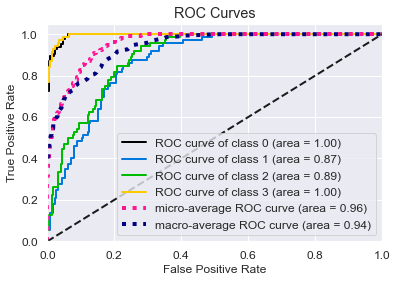

In [151]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scikitplot.metrics import plot_roc
from sklearn.metrics import f1_score, accuracy_score

import warnings
warnings.filterwarnings("ignore")
                        
C = [100, 10, 1, 0.1, 0.01]

# A simple handwritten param search using cross-validation
def cv_params(c_list, X_train, y_train):
    for c in c_list:
        model = LogisticRegression(C=c, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
        f1_score = cross_val_score(model, X_train, y_train, scoring="f1_macro", cv=5).mean()
        acc = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=5).mean()
        print(f"For C={c} ~> f1 score: {f1_score}, acc: {acc}")

cv_params(C, X_train, y_train)

# Finally let's estimate the model with given hyperparameters
lr = LogisticRegression(C=100, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
y_probas = lr.predict_proba(X_test)
# score = lr.score(X_test, y_test)
# print(f"Accuracy: {score}")

f1 = f1_score(y_test, y_preds, average="macro")
acc = accuracy_score(y_test, y_preds)
print("-"*70, f"Accuracy: {acc}", f"F1 score: {f1}", sep='\n')

plot_roc(y_test, y_probas)

In [132]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

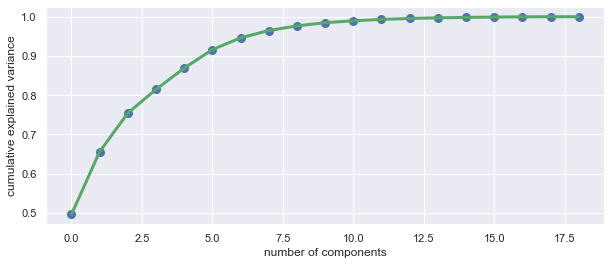

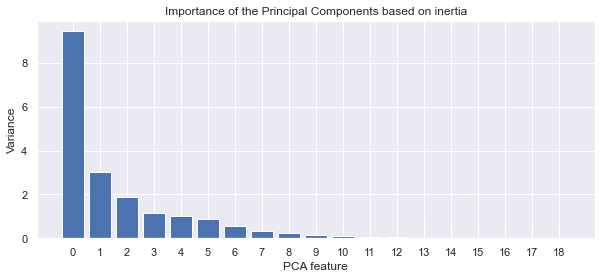

In [152]:
### YOUR CODE HERE
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)
plt.figure(figsize = (10, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), c = "g", linewidth = 3)
plt.scatter(np.arange(0, 19), np.cumsum(pca.explained_variance_ratio_), c = "b", linewidth = 3)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

features = range(pca.n_components_)
plt.figure(figsize=(10, 4))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Importance of the Principal Components based on inertia")
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [162]:
### YOUR CODE HERE

# It can be seen from the graph above that 11 components
# are needed to preserve about 99 percent of the variance.
# Therefore, we select the first 11 most important components
pca = PCA(n_components=11)

PrincipalComponentsTrain = pca.fit_transform(X_train)
PrincipalTrain = pd.DataFrame(data = PrincipalComponentsTrain)

PrincipalComponentsTest = pca.transform(X_test)
PrincipalTest = pd.DataFrame(data = PrincipalComponentsTest)

PrincipalTrain

,0,1,2,3,4,5,6,7,8,9,10
0,-5.383294,1.841539,0.112942,-1.371658,-0.101711,-0.852761,-0.016674,0.002778,-0.572986,-0.481879,0.191983
1,3.705403,1.336931,0.354103,0.374008,-2.291685,-0.328185,-0.008248,-0.669689,-0.416778,0.162910,-0.561908
2,0.572485,-1.806925,0.057056,-0.526168,0.958707,-0.890272,0.807348,-0.397157,-1.101802,0.075620,0.128501
3,0.864566,-0.570638,-0.561512,0.916659,0.532598,-0.573837,-0.160633,-1.068571,-0.552173,0.694796,-0.131261
4,-0.692041,0.858924,0.491974,0.394151,-0.075529,0.253395,-1.177892,-0.149304,-0.059485,-0.104234,0.430854
...,...,...,...,...,...,...,...,...,...,...,...
544,-2.345298,2.619772,0.702918,-0.437653,-1.654276,0.536829,0.028357,-0.646009,-0.119569,-0.086108,-0.074759
545,-4.249199,-1.665153,-1.040045,2.884642,1.515995,-0.517024,-0.096858,-0.250418,-0.321304,0.384018,-0.060888
546,2.792179,0.340786,-0.357776,0.403729,-0.210971,1.099961,0.899432,-0.343968,0.366011,0.241253,0.166606
547,-4.084367,3.027488,-0.329980,1.170988,0.993489,-0.464321,0.119654,0.189703,-0.218927,-0.032327,0.178239


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [163]:
### YOUR CODE HERE
from sklearn.model_selection import GridSearchCV

params = { 
    "C" : [100, 10, 1, 0.1, 0.01],
    "l1_ratio" : np.linspace(0, 1, 5)
}

lr = LogisticRegression(penalty="elasticnet", multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, n_jobs=-1)

grid = GridSearchCV(lr, params)
grid.fit(PrincipalTrain, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial', n_jobs=-1,
                                          penalty='elasticnet', solver='saga',
                                          tol=0.001),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ])})

In [164]:
print(f"Best params: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

Best params: {'C': 100, 'l1_ratio': 0.0}
Best score: 0.7541117597998331


----------------------------------------------------------------------
Accuracy: 0.6632996632996633
F1 score: 0.6600732953815216


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

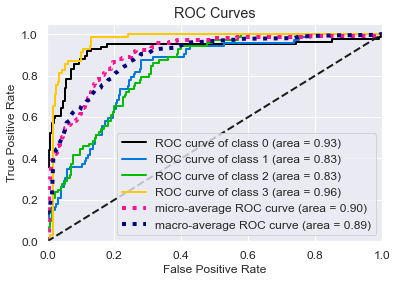

In [165]:
lr = LogisticRegression(penalty="elasticnet", multi_class='multinomial', 
                        solver='saga', tol=1e-3, max_iter=500, n_jobs=-1,
                        C=100, l1_ratio=0.0)

lr.fit(PrincipalTrain, y_train)

y_preds = lr.predict(PrincipalTest)
y_probas = lr.predict_proba(PrincipalTest)
# score = lr.score(X_test, y_test)
# print(f"Accuracy: {score}")

f1 = f1_score(y_test, y_preds, average="macro")
acc = accuracy_score(y_test, y_preds)
print("-"*70, f"Accuracy: {acc}", f"F1 score: {f1}", sep='\n')

plot_roc(y_test, y_probas)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [304]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier

tree_params = {"max_depth" : [None] + list(np.arange(10, 45, 5))}

TreeClf = DecisionTreeClassifier()
TreeClf.fit(X_train, y_train)

grid = GridSearchCV(TreeClf, tree_params)
grid.fit(X_train, y_train)

print(f"Best params: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

Best params: {'max_depth': 15}
Best score: 0.6721934945788156


----------------------------------------------------------------------
Accuracy: 0.6835016835016835
F1 score: 0.6824771225665124


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

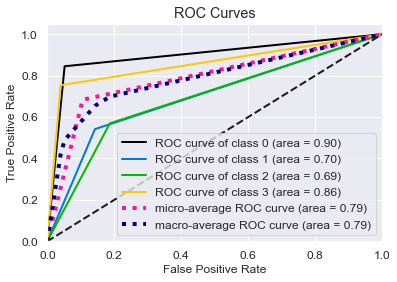

In [179]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier

TreeClf = DecisionTreeClassifier()

y_preds = TreeClf.predict(X_test)
y_probas = TreeClf.predict_proba(X_test)
# score = lr.score(X_test, y_test)
# print(f"Accuracy: {score}")

f1 = f1_score(y_test, y_preds, average="macro")
acc = accuracy_score(y_test, y_preds)
print("-"*70, f"Accuracy: {acc}", f"F1 score: {f1}", sep='\n')

plot_roc(y_test, y_probas)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE